In [2]:

import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt



In [11]:
df = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       5110 non-null   int64  
 5   heart_disease      5110 non-null   int64  
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     5110 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


The information of the above dataframe shows that values are missing from the bmi column. Before manipulating the dataframe, let's have a look at its description.

In [14]:
df.describe()

,index,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,2554.500000,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,1475.274268,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1277.250000,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,2554.500000,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,3831.750000,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,5109.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Univariate Analysis

## Distribution of stroke records in the dataset

Text(0.5, 1.0, 'Distribution of Stroke records')

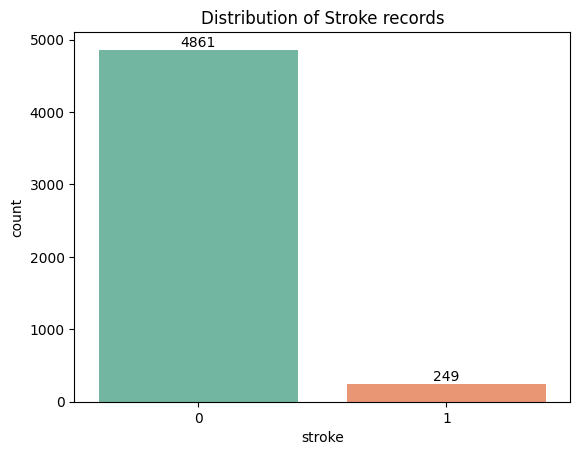

In [68]:
import warnings
warnings.simplefilter("ignore")
ax = sns.countplot(x='stroke', data=df, palette = "Set2", order=df['stroke'].value_counts().index)
for i in range(len(df['stroke'].unique())):
    ax.bar_label(ax.containers[i])
plt.title("Distribution of Stroke records")

we see that the dataset is highly imbalanced with only 249 stroke positive records againt 4861 negative stroke records.

## Distribution of hypertension records

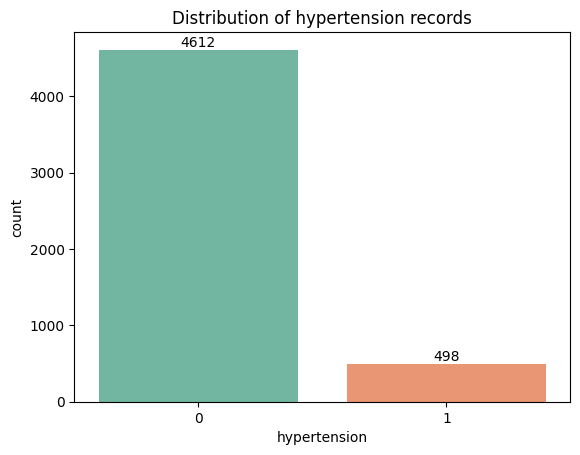

In [69]:
plt.title("Distribution of hypertension records")

ax = sns.countplot(x='hypertension', data=df, palette = "Set2", order=df['hypertension'].value_counts().index)
for i in range(len(df['hypertension'].unique())):
    ax.bar_label(ax.containers[i])

## Distribution of heart disease records

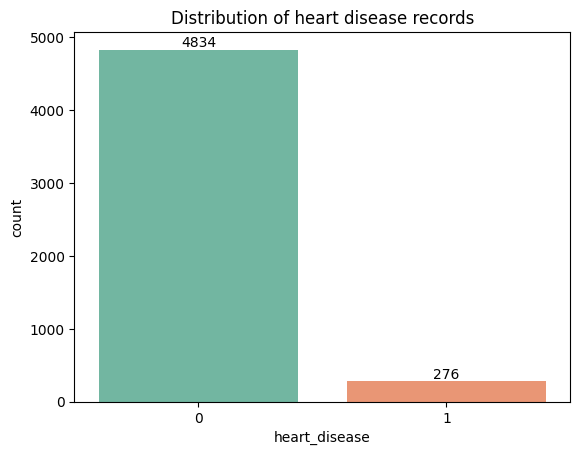

In [53]:
plt.title("Distribution of heart disease records")
ax = sns.countplot(x='heart_disease', data=df, palette = "Set2", order=df['heart_disease'].value_counts().index)
for i in range(len(df['heart_disease'].unique())):
    ax.bar_label(ax.containers[i])

## Distribution of work type

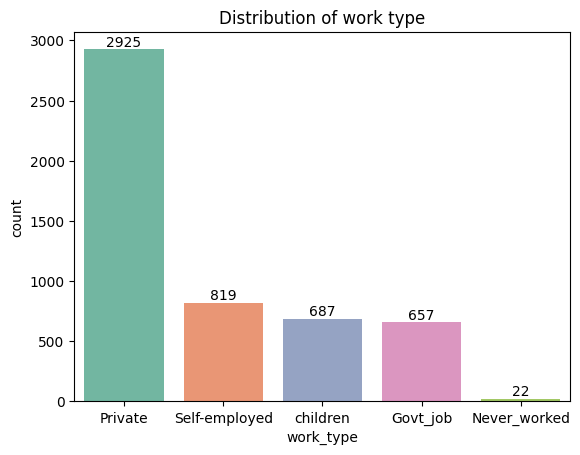

In [52]:
plt.title("Distribution of work type")
ax = sns.countplot(x='work_type', data=df, palette = "Set2", order=df['work_type'].value_counts().index)
for i in range(len(df['work_type'].unique())):
    ax.bar_label(ax.containers[i])

## Distribution of Residence type

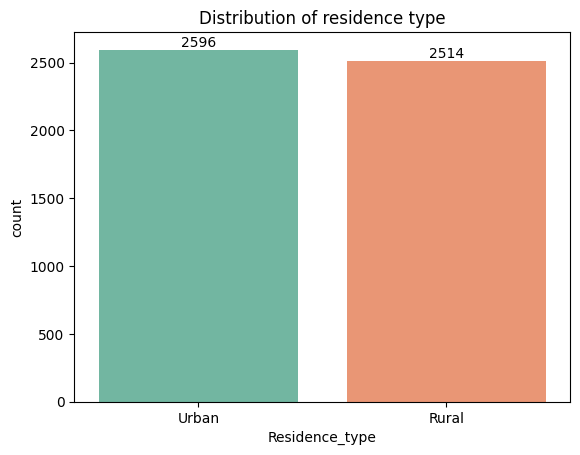

In [71]:
ax = sns.countplot(x='Residence_type', data=df, palette = "Set2", order=df['Residence_type'].value_counts().index)
plt.title("Distribution of residence type")
for i in range(len(df['Residence_type'].unique())):
    ax.bar_label(ax.containers[i])


## Distribution of marriage status

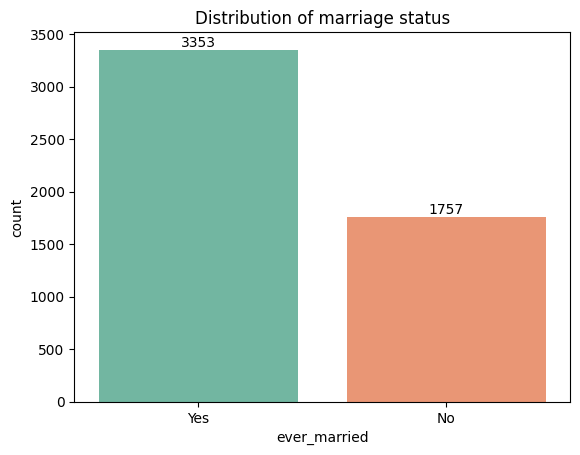

In [72]:
ax = sns.countplot(x='ever_married', data=df, palette = "Set2", order=df['ever_married'].value_counts().index)
plt.title("Distribution of marriage status")
for i in range(len(df['ever_married'].unique())):
    ax.bar_label(ax.containers[i])


## Distribution of average glucose level

https://developers.google.com/machine-learning/data-prep/transform/normalization

Text(0.5, 1.0, 'Distribution of avergae glucose level')

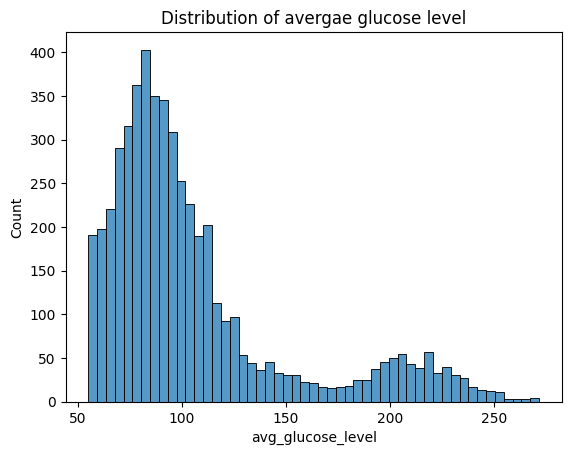

In [79]:
sns.histplot(data=df, x="avg_glucose_level", palette = "Set2" )
plt.title("Distribution of avergae glucose level")

## Distribution of BMI

Text(0.5, 1.0, 'Distribution of BMI')

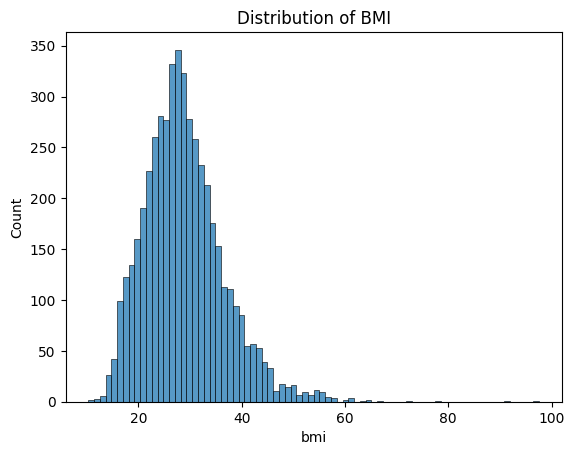

In [80]:
sns.histplot(data=df, x="bmi", palette = "Set2" )
plt.title("Distribution of BMI")

## Distribution of age

Text(0.5, 1.0, 'Distribution of age')

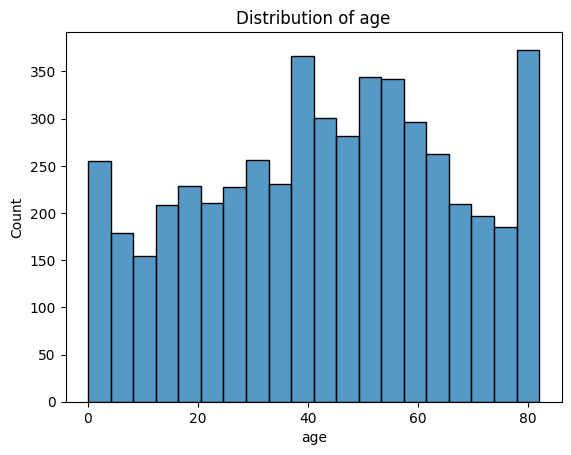

In [81]:
sns.histplot(data=df, x="age", palette = "Set2" )
plt.title("Distribution of age")

# Handling missing data

From columns bmi, (5110-4909)/5110, almost 4% of values are missing.

Let's explore scenarios in which this data is missing. We need to explore this so as to check if data is missing randomly.

In [82]:
missing_data = df[df['bmi'].isnull()]
missing_data

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


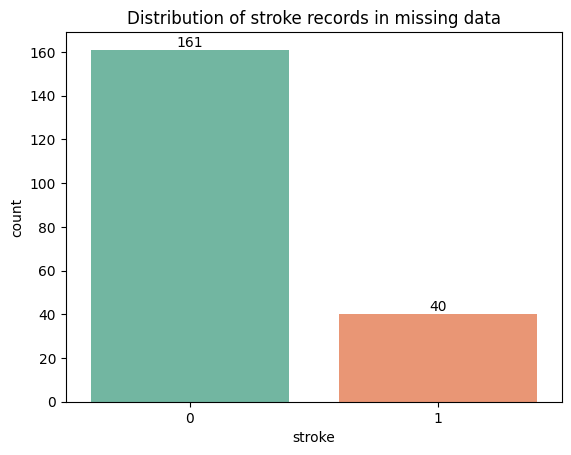

In [86]:
missing_data = missing_data.copy()
missing_data['stroke'] = missing_data['stroke'].astype(str)

ax = sns.countplot(x='stroke', data=missing_data, palette = "Set2", order=missing_data['stroke'].value_counts().index)
plt.title("Distribution of stroke records in missing data")
for i in range(len(missing_data['ever_married'].unique())):
    ax.bar_label(ax.containers[i])


From the missing data, 40 records are stroke positive. Missing data in this category doesn't seem specific.

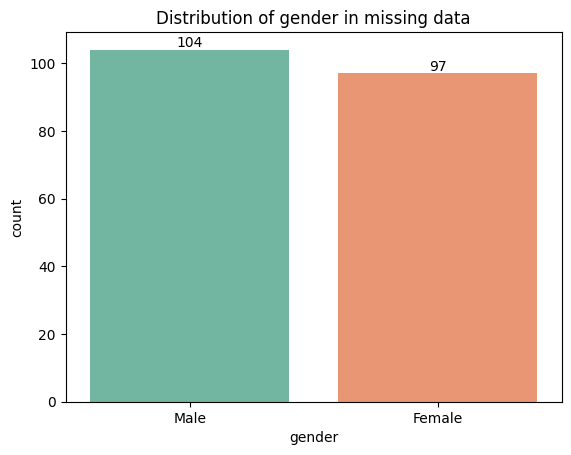

In [85]:
ax = sns.countplot(x='gender', data=missing_data, palette = "Set2", order=missing_data['gender'].value_counts().index)
plt.title("Distribution of gender in missing data")
for i in range(len(missing_data['gender'].unique())):
    ax.bar_label(ax.containers[i])

Missing data seems random in gender category as well.

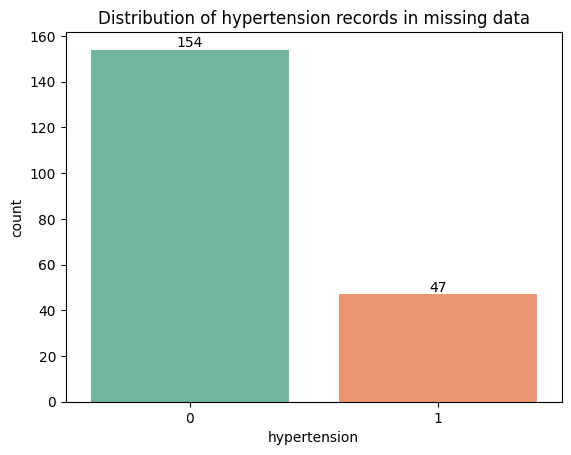

In [87]:
ax = sns.countplot(x='hypertension', data=missing_data, palette = "Set2", order=missing_data['hypertension'].value_counts().index)
plt.title("Distribution of hypertension records in missing data")
for i in range(len(missing_data['hypertension'].unique())):
    ax.bar_label(ax.containers[i])

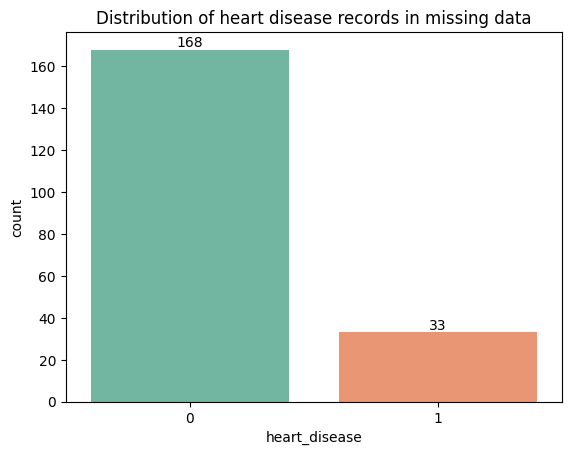

In [88]:
ax = sns.countplot(x='heart_disease', data=missing_data, palette = "Set2", order=missing_data['heart_disease'].value_counts().index)
plt.title("Distribution of heart disease records in missing data")
for i in range(len(missing_data['heart_disease'].unique())):
    ax.bar_label(ax.containers[i])

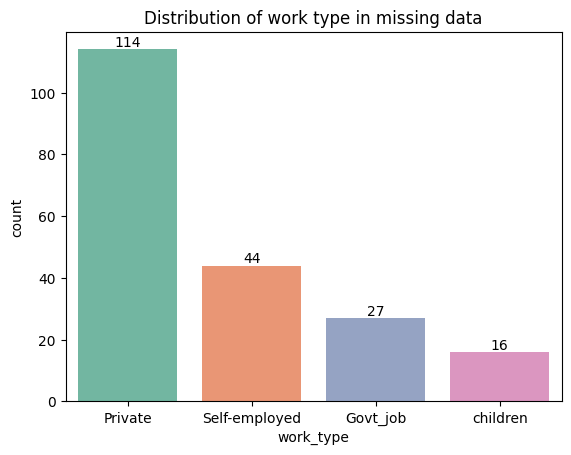

In [90]:
ax = sns.countplot(x='work_type', data=missing_data, palette = "Set2", order=missing_data['work_type'].value_counts().index)
plt.title("Distribution of work type in missing data")
for i in range(len(missing_data['work_type'].unique())):
    ax.bar_label(ax.containers[i])

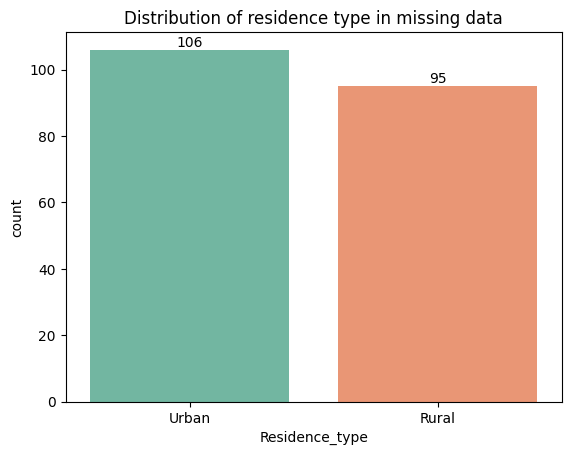

In [94]:
ax = sns.countplot(x='Residence_type', data=missing_data, palette = "Set2", order=missing_data['Residence_type'].value_counts().index)
plt.title("Distribution of residence type in missing data")
for i in range(len(missing_data['Residence_type'].unique())):
    ax.bar_label(ax.containers[i])

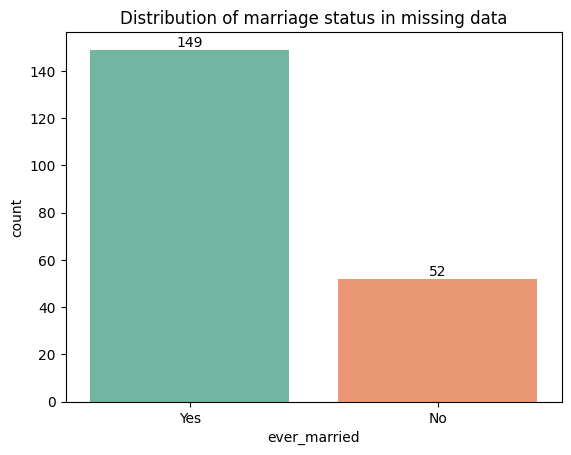

In [93]:
ax = sns.countplot(x='ever_married', data=missing_data, palette = "Set2", order=missing_data['ever_married'].value_counts().index)
plt.title("Distribution of marriage status in missing data")
for i in range(len(missing_data['ever_married'].unique())):
    ax.bar_label(ax.containers[i])

The reason we explore missing values with different feature is to see if these missing values occur at random or to a particular sub-category. 

If we drop 33 rows of records with stroke = 1, then we'd be losing 13% stroke positive data which is a lot given we have only have around 250 records of stroke positive data.

Lets also explore the correlation of each feature to the target column.

We need to change string categorical value to numerical categroies before finding correlation between features.

In [95]:
from sklearn.preprocessing import LabelEncoder
married_le = LabelEncoder()
married_le.fit(df['ever_married'])
df['ever_married_numeric'] = married_le.transform(df['ever_married'])
married_le.classes_

array(['No', 'Yes'], dtype=object)

We do the same with 'work_type' column.

In [96]:
work_le = LabelEncoder()
work_le.fit(df['work_type'])
df['work_type_numeric'] = work_le.transform(df['work_type'])
work_le.classes_

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [97]:
res_le = LabelEncoder()
res_le.fit(df['Residence_type'])
df['Residence_type_numeric'] = res_le.transform(df['Residence_type'])
res_le.classes_

array(['Rural', 'Urban'], dtype=object)

In [98]:
smoke_le = LabelEncoder()
smoke_le.fit(df['smoking_status'])
df['smoking_status_numeric'] = smoke_le.transform(df['smoking_status'])
smoke_le.classes_

array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
      dtype=object)

In [99]:
gen_le = LabelEncoder()
gen_le.fit(df['gender'])
df['gender_numeric'] = gen_le.transform(df['gender'])
gen_le.classes_

array(['Female', 'Male', 'Other'], dtype=object)

In [100]:
df.columns

Index(['index', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke', 'ever_married_numeric',
       'work_type_numeric', 'Residence_type_numeric', 'smoking_status_numeric',
       'gender_numeric'],
      dtype='object')

In [102]:
df._get_numeric_data().columns

Index(['index', 'id', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'stroke', 'ever_married_numeric',
       'work_type_numeric', 'Residence_type_numeric', 'smoking_status_numeric',
       'gender_numeric'],
      dtype='object')

In [103]:
fig = px.imshow(df._get_numeric_data().corr(), text_auto=True, title="Heatmap of Correlation")
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

We don't find any feature that is strongly correlated to the target column. Hence, we do not drop the 'bmi' column.

So, instead of dropping records, we are going to fill in the null values using KNN Imputation.


KNN can get affected by the range of data. 
Since, data in univariate analysis doesn't contain extreme values that will affect KNN, we do not scale it.
Also, There are no negative values in bmi, age, glucose level and all values lie in theoritical possible range.



In [104]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numeric_wo_stroke = df._get_numeric_data().loc[:, df._get_numeric_data().columns != 'stroke']
imputer.fit_transform(numeric_wo_stroke)
df2 = pd.DataFrame(imputer.fit_transform(numeric_wo_stroke), columns=numeric_wo_stroke.columns)
df['bmi'] = df2['bmi'] 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   5110 non-null   int64  
 1   id                      5110 non-null   int64  
 2   gender                  5110 non-null   object 
 3   age                     5110 non-null   float64
 4   hypertension            5110 non-null   int64  
 5   heart_disease           5110 non-null   int64  
 6   ever_married            5110 non-null   object 
 7   work_type               5110 non-null   object 
 8   Residence_type          5110 non-null   object 
 9   avg_glucose_level       5110 non-null   float64
 10  bmi                     5110 non-null   float64
 11  smoking_status          5110 non-null   object 
 12  stroke                  5110 non-null   int64  
 13  ever_married_numeric    5110 non-null   int32  
 14  work_type_numeric       5110 non-null   

# Bivariate Analysis

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   5110 non-null   int64  
 1   id                      5110 non-null   int64  
 2   gender                  5110 non-null   object 
 3   age                     5110 non-null   float64
 4   hypertension            5110 non-null   int64  
 5   heart_disease           5110 non-null   int64  
 6   ever_married            5110 non-null   object 
 7   work_type               5110 non-null   object 
 8   Residence_type          5110 non-null   object 
 9   avg_glucose_level       5110 non-null   float64
 10  bmi                     5110 non-null   float64
 11  smoking_status          5110 non-null   object 
 12  stroke                  5110 non-null   int64  
 13  ever_married_numeric    5110 non-null   int32  
 14  work_type_numeric       5110 non-null   

## Categorical Features

### What is the % of stroke occurence amongst genders?

In [107]:
import plotly.express as px
fig = px.sunburst(df, path=['gender', 'stroke'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Percentage of stroke amongst genders")
fig.show()


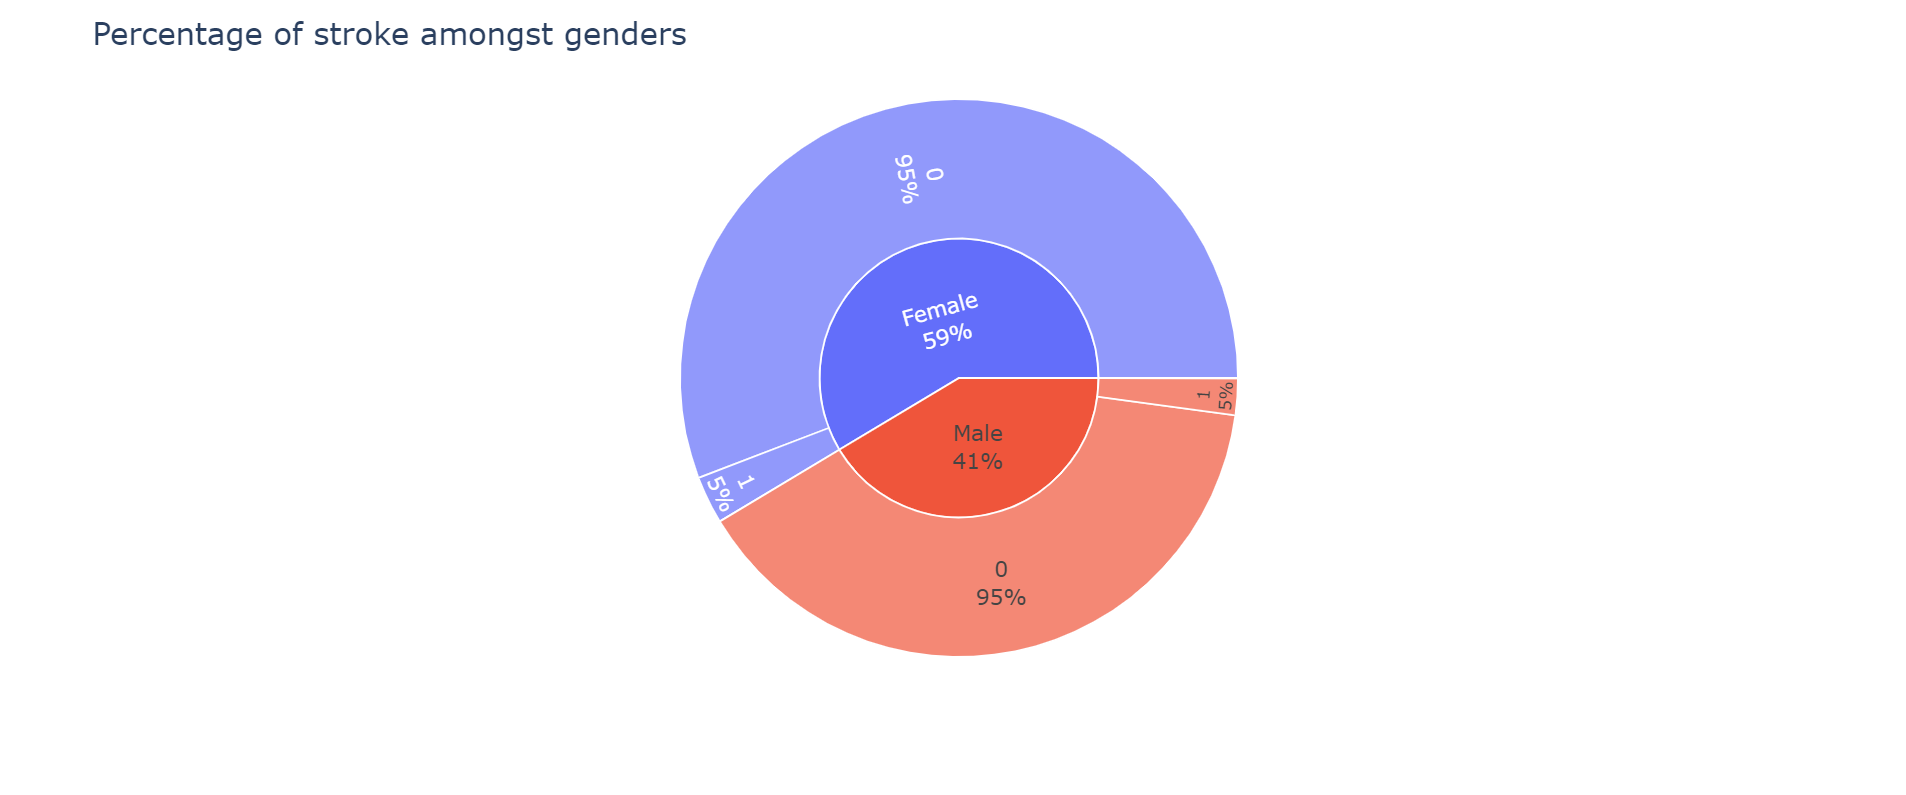

According to this visualisation, both men and women have equal tendency of getting stroke.

### What is % of hypertension amongst genders?

In [108]:
import plotly.express as px
fig = px.sunburst(df, path=['gender', 'hypertension'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Percentage of hypertension amongst genders")
fig.show()


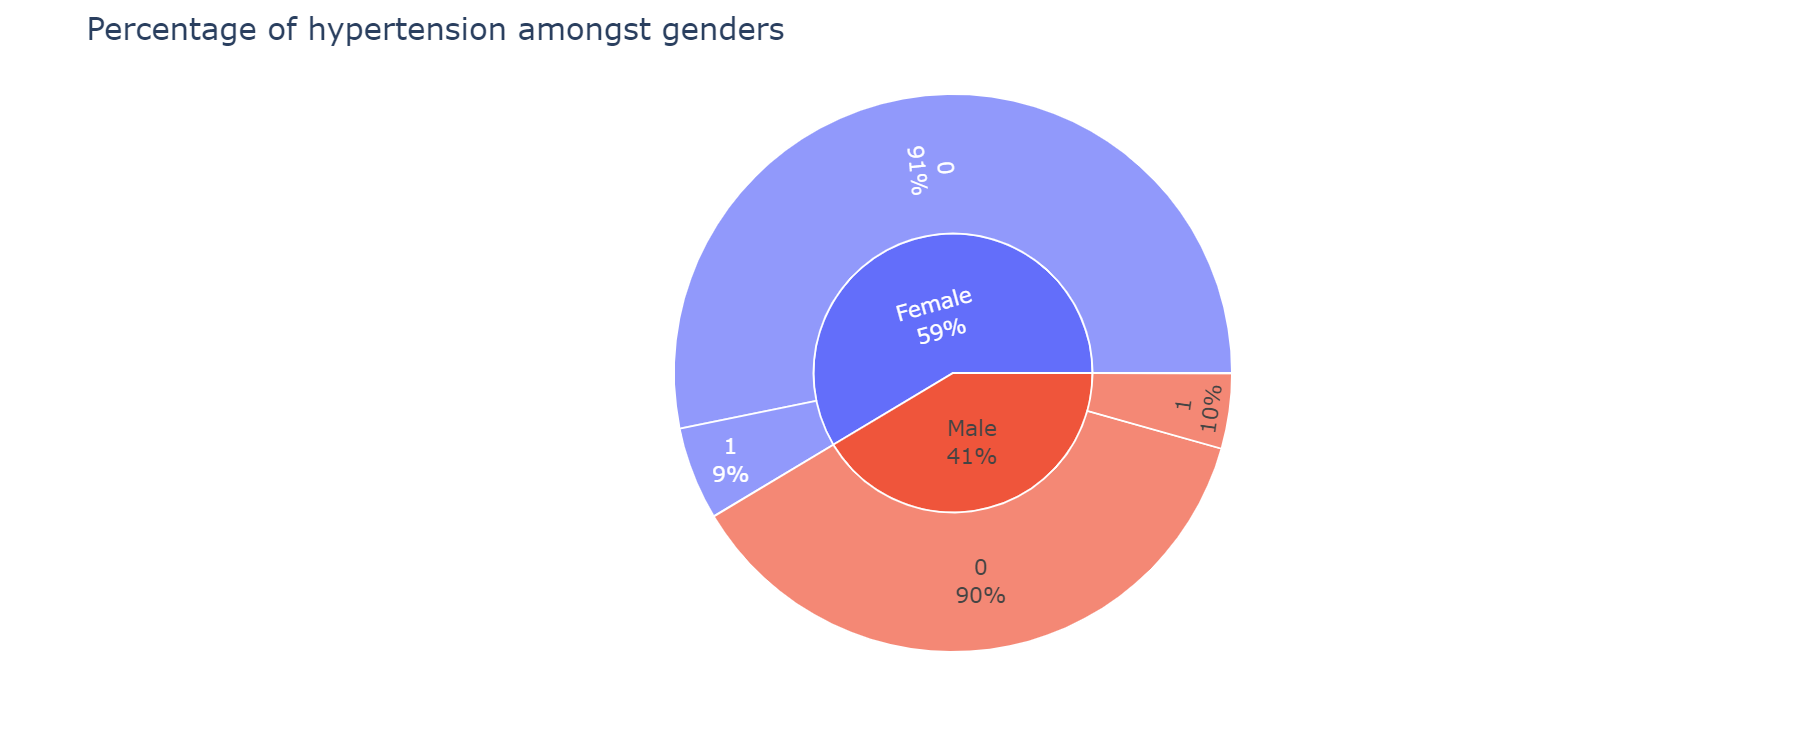

### What is the % heart disease occurence amongst genders?

In [37]:
import plotly.express as px
fig = px.sunburst(df, path=['gender', 'heart_disease'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Percentage of heart disease amongst genders")

fig.show()

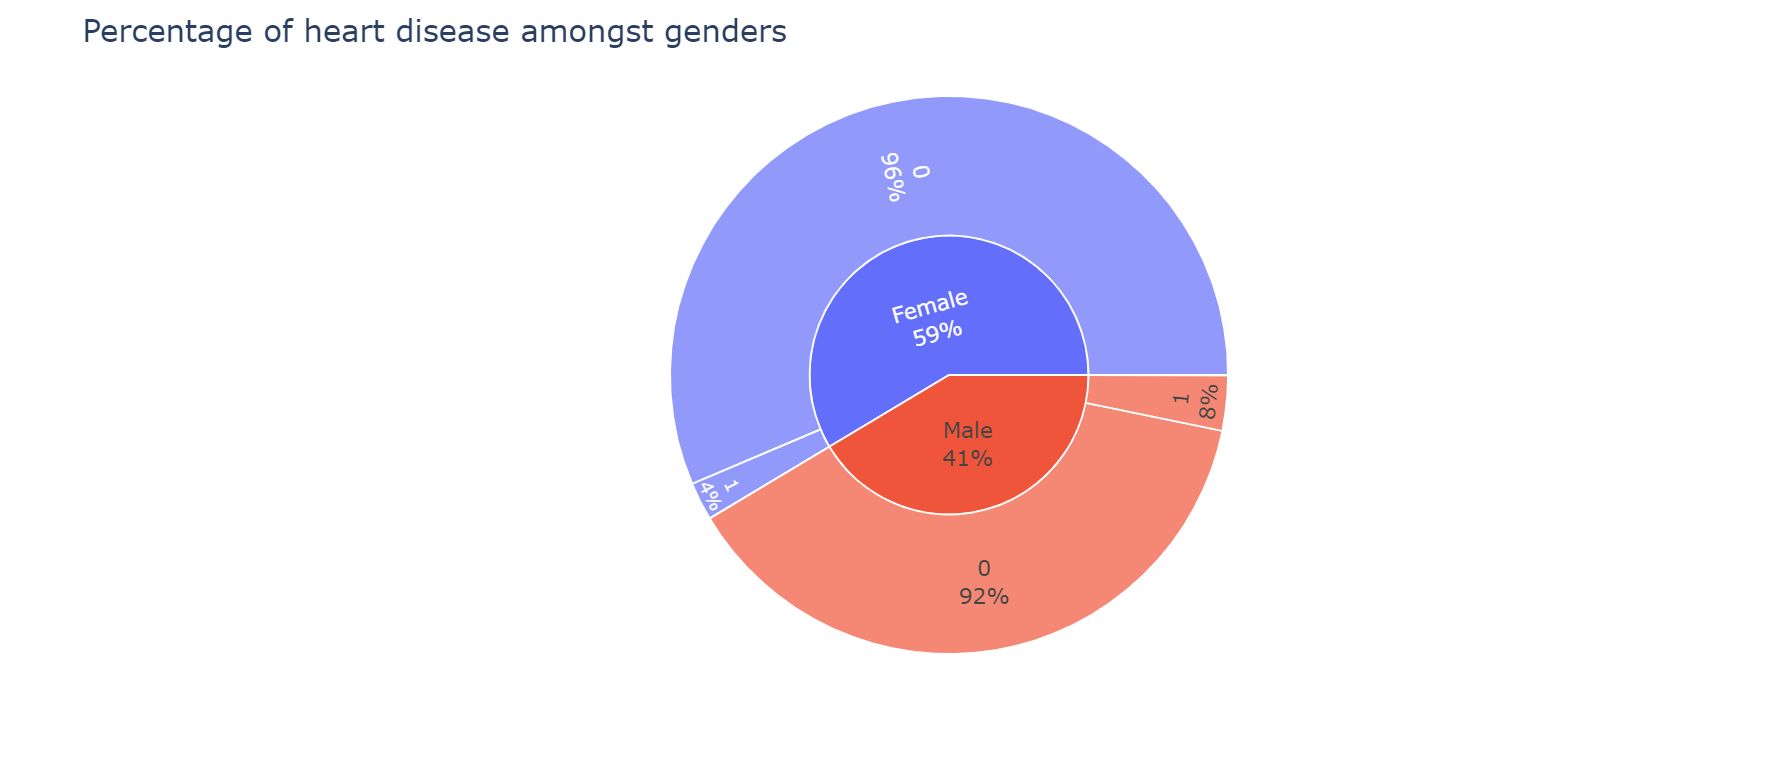

According to the visualisation, men have higher tendency to get a heart disease.

### What is the % of smoking status amongst genders?

In [38]:
import plotly.express as px
fig = px.sunburst(df, path=['gender', 'smoking_status'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Smoke status % amongst genders")
fig.show()

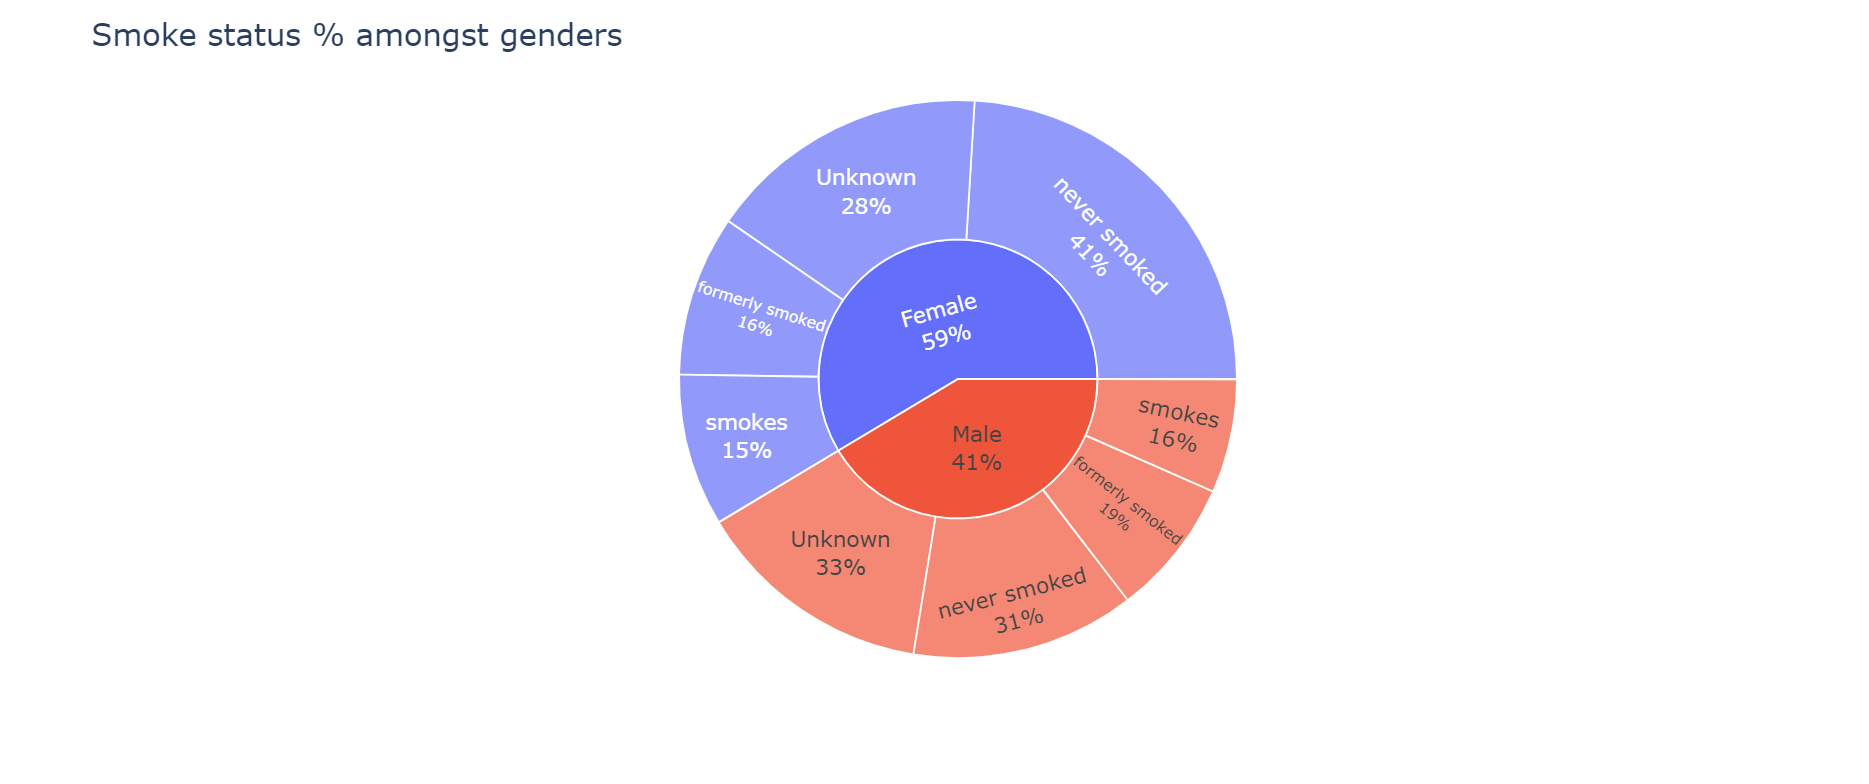

From the above visualisation,

The number of women who have never smoked is higher than number of men who have never smoked.

Percentage of women and men who smoke is almost equal.



### What is % work type with stroke?

In [116]:
import plotly.express as px
fig = px.sunburst(df, path=['stroke', 'work_type'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Work type % with stroke")
plt.figure(figsize=(60,60))
fig.show()

<Figure size 6000x6000 with 0 Axes>

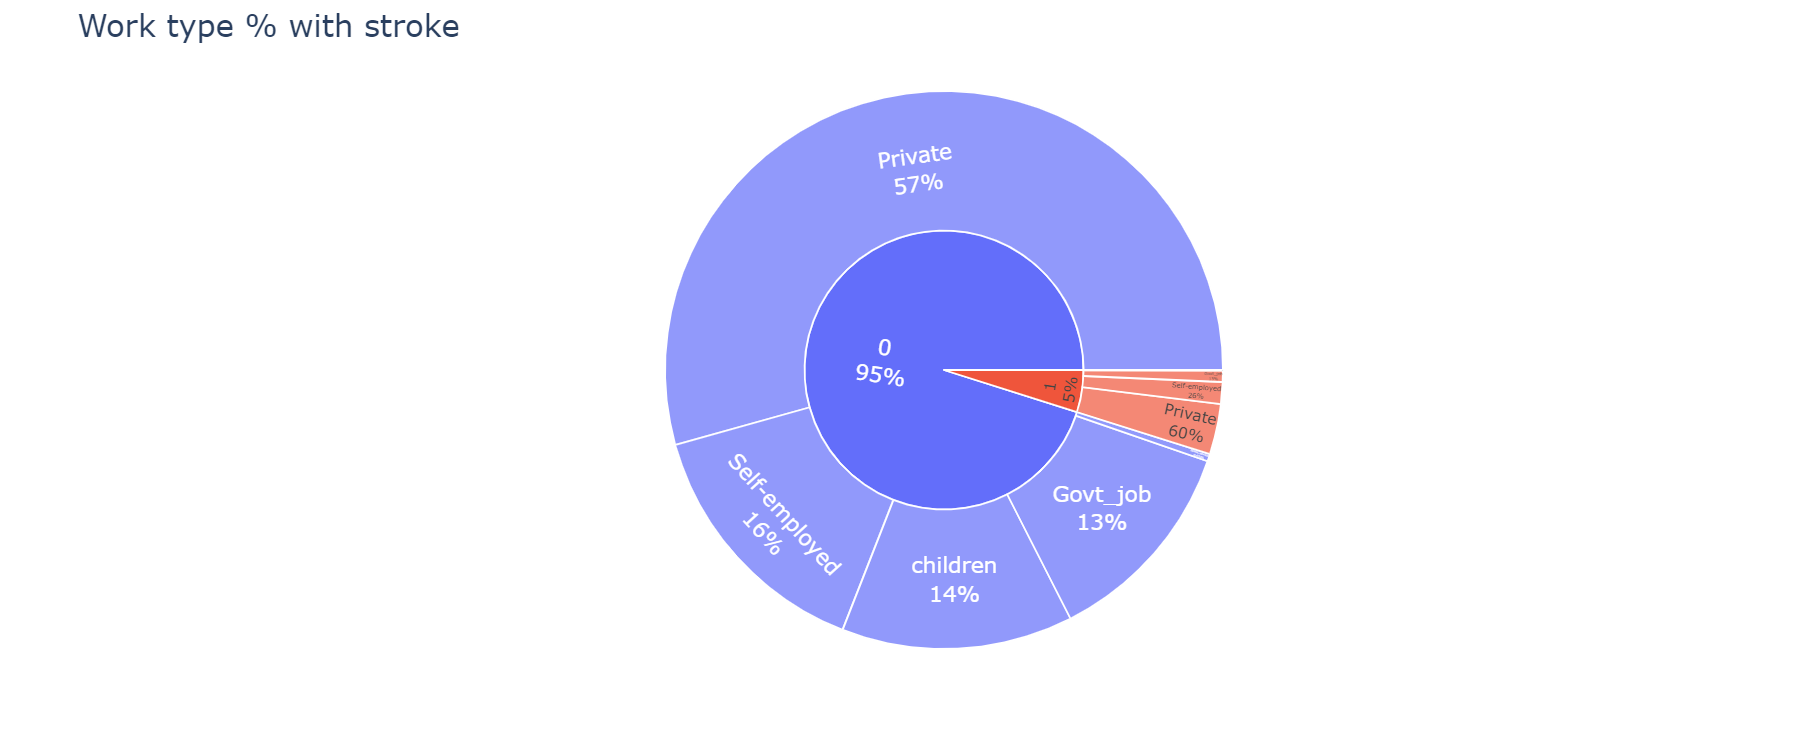

The largest group, 60%, of people with stroke belong to private sector.25% are self-employed, 13% have a government job, and a very small percentage are children.

### What is % of work type with hypertension?

In [117]:
import plotly.express as px
fig = px.sunburst(df, path=['hypertension', 'work_type'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Work type % with hypertension")
plt.figure(figsize=(60,60))
fig.show()

<Figure size 6000x6000 with 0 Axes>

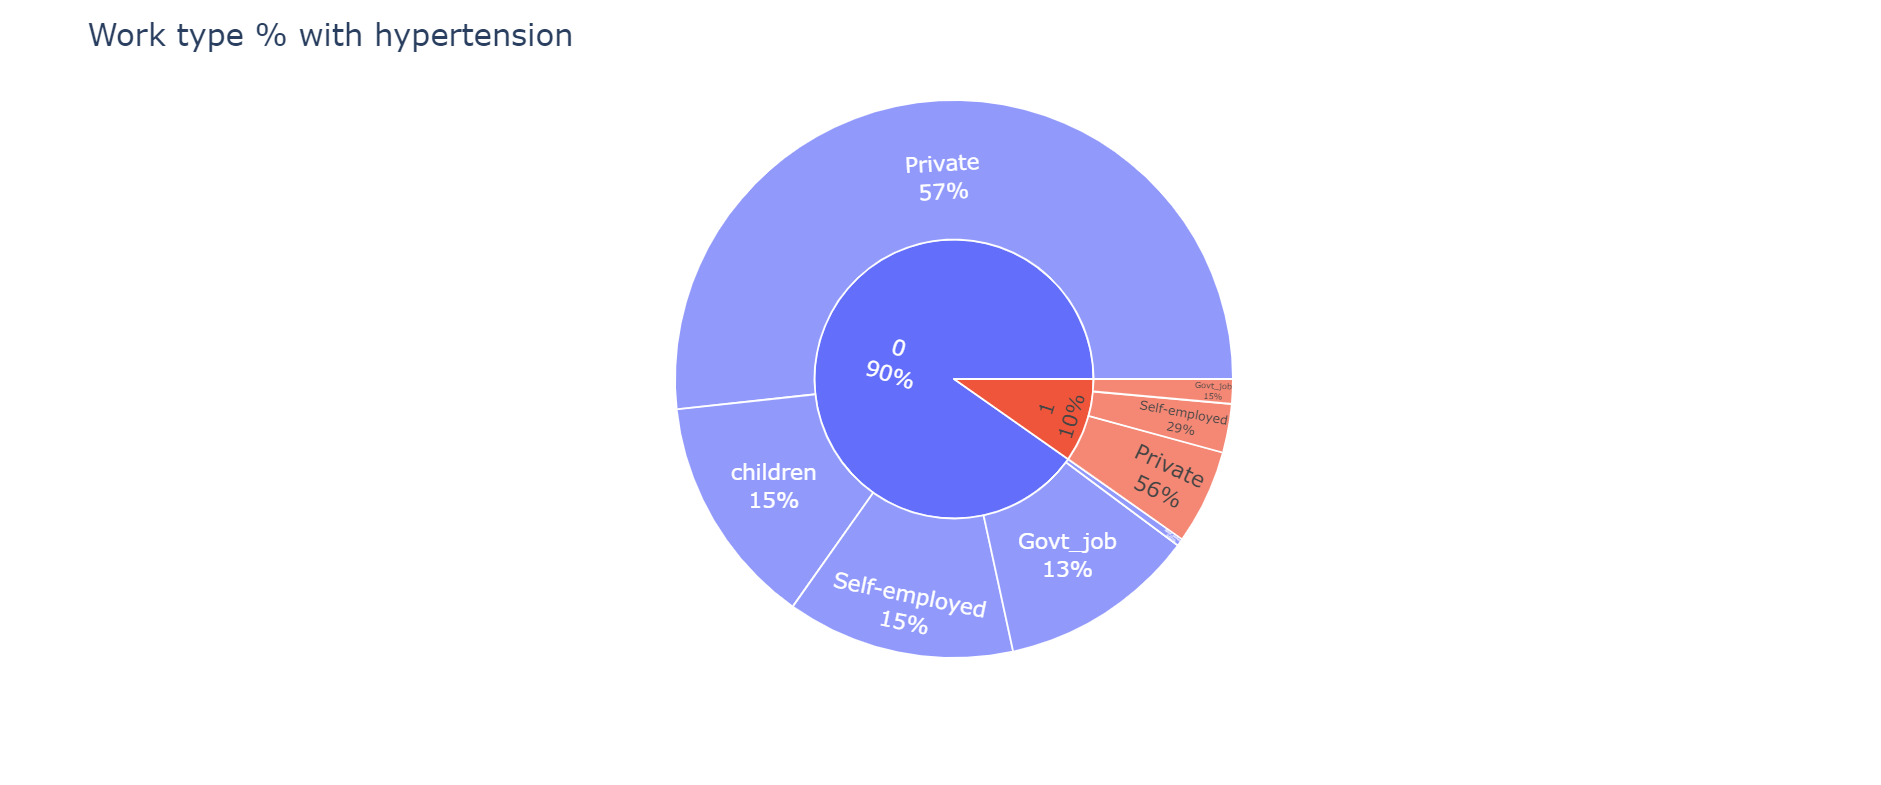

A similar distribution of work type with hypetension - largest group,56%, is in private sector, then 29% are self-employed, 15% have government job.

### Relationship between BMI and Age

Text(0.5, 1.0, 'Scatterplot - Age v/s BMI')

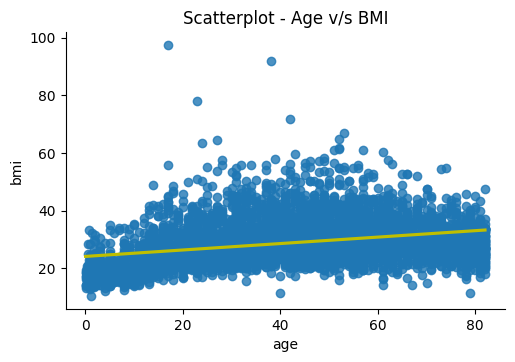

In [138]:
# sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['stroke'])
sns.lmplot(data=df, x='age', y='bmi', line_kws={'color': 'y'}, height=3.5, aspect=1.5)
plt.title("Scatterplot - Age v/s BMI")

Data points are densely packed between BMIs of about 20 to about 60, showing common BMI values for the sampled population.

There’s an increase in data point density as age increases up until around age 60, after which it appears stable.

### Relationship between average glucose level and age

Text(0.5, 1.0, 'Scatterplot - Age v/s Average Glucose Level')

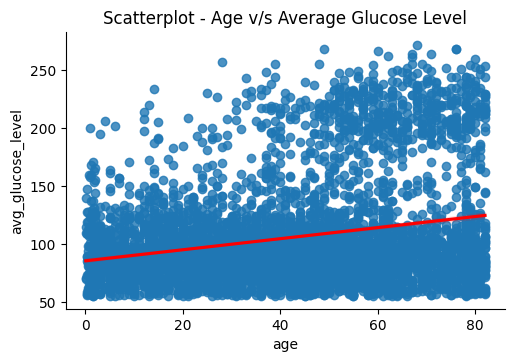

In [140]:
sns.lmplot(data=df, x='age', y='avg_glucose_level', line_kws={'color': 'r'}, height=3.5, aspect=1.5)
plt.title("Scatterplot - Age v/s Average Glucose Level")

Text(0.5, 1.0, 'Scatterplot - Average Glucose Level v/s BMI')

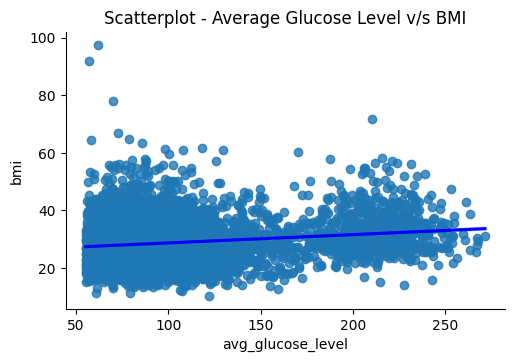

In [144]:
sns.lmplot(data=df, x='avg_glucose_level', y='bmi', line_kws={'color': 'b'}, height=3.5, aspect=1.5)
plt.title("Scatterplot - Average Glucose Level v/s BMI")

# Hypothesis Testing

we are going to categorise BMI into 3 categories - 'underweight', 'healthy', 'overweight'.

To categorise this column, we're going to use the following conditions:

If BMI is less than 18.5, it falls within the underweight range.

If BMI is 18.5 to 24.9, it falls within the Healthy Weight range.

If BMI is 25.0 to 29.9, it falls within the overweight range.

If BMI is over 29.9, it falls within the obese range.

https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.

In [145]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    if bmi < 24.9:
        return 'Healthy'
    if bmi < 29.9:
        return 'Overweight'
    if bmi > 29.9:
        return 'Obese'
    return bmi
df['bmi_category'] = df['bmi'].apply(bmi_category)

## Is smoking related to stroke?

In [146]:
stroke_smoking = pd.crosstab(df["stroke"],df["smoking_status"])
print(stroke_smoking)

smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
0                  1497              815          1802     747
1                    47               70            90      42


In [147]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(stroke_smoking)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 3
Expected frequencies  [[1468.76399217  841.87573386 1799.80665362  750.55362035]
 [  75.23600783   43.12426614   92.19334638   38.44637965]]


In [148]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=7.815, stat=29.147


In [149]:
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


#### Therefore, Smoking and Stroke are related.

## Is the BMI related to stroke?

## Is heart disease related to stroke?